# Project on prediction of the class of people who had problems paying their energy bills during the last few months

## Importing libraries

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # For data visualization, we import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## Importing classifiers

In [2]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

#from sklearn.multioutput import MultiOutputClassifier

## Reading the P2 data set

In [3]:
Energy = pd.read_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\CE802_P2_Data\\CE802_P2_Data.csv')
Energy

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1,4.09930,16381.38,0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.75,False
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0,4.36770,16036.38,0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.35,False
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0,5.01500,16097.92,1,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.01,True
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0,3.88900,16120.46,1,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,NaN,False


In [4]:
Energy.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,-28749.730710,1.259000,-5.008527,-7.073618,1787.391510,0.507000,4.314597,16794.708266,0.481000,-10014.212102,...,39.155125,-13.932299,6.097217,15.932875,4.033075,9994.592611,-3750.649178,3.255798,-5066.909169,-10.183520
std,1688.229804,0.499408,1.343875,2.708288,702.890861,0.500201,0.614178,2074.355688,0.499889,1494.941683,...,14.584924,10.285697,1.802407,2.708330,2.609035,1058.036210,739.616151,2.699756,1023.164795,1.062748
min,-81470.290000,0.730000,-15.676000,-17.676000,-1942.650000,0.000000,3.540592,7679.980000,0.000000,-19975.820000,...,-18.360000,-85.560000,4.225980,12.966360,1.266660,3700.240000,-8521.050000,0.334140,-12915.220000,-13.620000
25%,-28720.400000,0.730000,-5.319050,-8.262750,1506.272500,0.000000,3.827700,15994.420000,0.000000,-10175.920000,...,29.930250,-16.732500,4.743650,13.852350,2.079975,9584.540000,-3791.062500,1.150725,-5335.020000,-10.925000
50%,-28701.070500,1.730000,-4.507200,-6.221100,1649.040000,1.000000,4.180750,16381.580000,0.000000,-9636.920000,...,39.270150,-10.862000,5.534500,15.096750,3.267150,9755.930000,-3589.140000,2.384400,-5044.997000,-10.135000
75%,-28682.255000,1.730000,-4.127370,-5.059425,1880.725000,1.000000,4.694500,17021.730000,1.000000,-9383.513500,...,48.359250,-6.972000,6.834000,17.170500,5.188500,10066.240000,-3489.926250,4.704750,-4795.820000,-9.450000
max,-24983.290000,1.730000,-4.040002,-4.206600,6602.350000,1.000000,7.081000,32339.980000,1.000000,-1929.820000,...,86.280000,-3.782328,13.330000,26.424000,14.805000,21124.240000,1171.950000,13.536000,1892.780000,-6.810000


In [5]:

# check missing data status
Energy.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [6]:
Energy.dtypes    # checking the datatypes of each feature

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6         int64
F7       float64
F8       float64
F9         int64
F10      float64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
F16      float64
F17      float64
F18      float64
F19      float64
F20      float64
F21      float64
Class       bool
dtype: object

In [7]:
Energy.iloc[:10,20]   # displaying first 10 rows of column 21 having NaN values

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5   -11.68
6    -9.55
7      NaN
8      NaN
9      NaN
Name: F21, dtype: float64

In [8]:
Energy.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.735,5.9854,14.24730,1.48920,9959.04,-3199.35,6.86700,-4850.82,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.171,4.6222,14.99820,3.12060,10107.44,-3064.95,9.47100,378.78,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.650,4.4096,17.79000,1.98180,10971.04,-3638.85,2.03730,-5215.48,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.639,8.5080,12.98424,11.56200,9681.10,724.95,2.02200,-4378.42,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.730,5.5188,13.57260,2.54400,10965.64,-2607.15,4.31400,-1919.22,NaN,True
5,-28705.287,1.73,-5.185600,-11.22600,1250.15,0,4.23280,17286.18,1,-9435.880,...,-6.654,4.7846,13.44120,2.31270,9762.90,-2841.45,2.94870,-4973.60,-11.68,True
6,-28664.510,1.73,-5.188800,-6.61470,1079.35,1,3.61638,9467.98,1,-15433.820,...,-7.631,4.6290,15.41340,1.32114,9905.84,-3290.13,0.45504,-4813.82,-9.55,True
7,-28709.973,1.73,-7.898000,-8.76000,1084.95,1,4.25490,16397.18,1,-10107.020,...,-10.322,4.6420,13.85250,2.23650,15152.24,-2912.85,1.80240,-4898.22,NaN,True
8,-28624.220,1.73,-5.642400,-5.03670,2533.25,0,4.01400,13923.98,0,-9682.420,...,-15.240,4.6122,13.43340,3.09300,9359.04,-4876.95,0.60300,-5530.62,NaN,False
9,-28692.215,1.73,-5.126600,-9.28800,1769.45,0,5.86100,12569.98,1,-10185.820,...,-7.892,7.9520,18.26100,2.25360,9203.84,-3756.27,0.99150,-5235.74,NaN,False


## Converting binary categorial values to numerical values

In [9]:

Energy['Class'] = Energy['Class'].astype(int)  
Energy

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,NaN,0
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,NaN,1
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,NaN,0
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,NaN,0
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1,4.09930,16381.38,0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.75,0
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0,4.36770,16036.38,0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.35,0
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0,5.01500,16097.92,1,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.01,1
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0,3.88900,16120.46,1,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,NaN,0


## Separating the inputs and output columns of the dataset 

In [10]:
y = Energy.loc[:, 'Class'] #.to_numpy()
x = Energy.loc[:, Energy.columns != 'Class'].to_numpy()

print(x.shape, y.shape)


(1000, 21) (1000,)


## Plotting Scatter plot for each feature

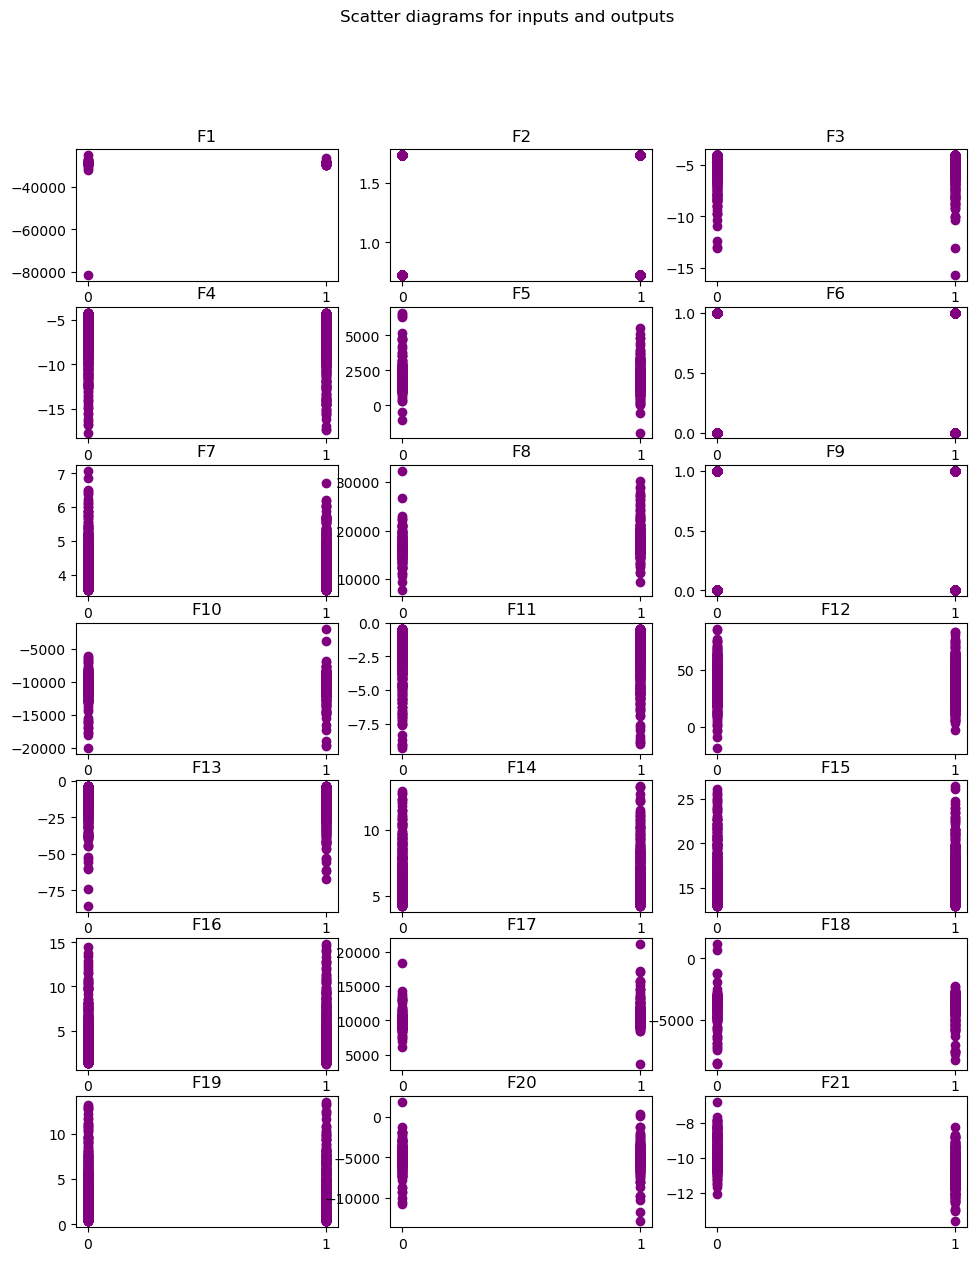

In [11]:
plt.figure(figsize=(11.5,14))
plt.suptitle('Scatter diagrams for inputs and outputs') 
for i in range(0,21):
    plt.subplot(7, 3, i+1)
    plt.scatter(y,x[:,i], color = 'Purple')
    plt.xticks([0, 1])
    plt.title(Energy.columns[i])



In [12]:

Energy_copy = Energy.copy()

x_drop = Energy.drop(Energy.columns[[1,5,8,21]], axis=1).to_numpy()   # dropping columns with binary values along with class column
x_drop


array([[-2.8703964e+04, -4.0517520e+00, -6.9963000e+00, ...,
         6.8670000e+00, -4.8508200e+03,            nan],
       [-2.8726730e+04, -5.1530000e+00, -4.2740400e+00, ...,
         9.4710000e+00,  3.7878000e+02,            nan],
       [-2.8717120e+04, -8.4400000e+00, -8.2590000e+00, ...,
         2.0373000e+00, -5.2154800e+03,            nan],
       ...,
       [-2.8667610e+04, -4.8870000e+00, -1.1412000e+01, ...,
         2.6988000e+00, -4.9658800e+03, -1.1010000e+01],
       [-2.8750050e+04, -5.4908000e+00, -5.0748000e+00, ...,
         6.1860000e+00, -4.2610200e+03,            nan],
       [-2.8700553e+04, -4.0400088e+00, -5.7420000e+00, ...,
         2.5524000e+00, -5.0198000e+03,            nan]])

# Scaling and Normalization

#### Calculating mean of column and replacing the NaN values with mean

In [13]:
mean = np.nanmean(x_drop[:,17])
x_drop[np.isnan(x_drop[:,17]), 17] = mean              # We substitute the missing values for the mean

print("\n Mean value for F21 column: ", mean)



 Mean value for F21 column:  -10.18352


#### Scaling and standardization

In [14]:
ss = StandardScaler()
ss.fit(x_drop)
x_drop = ss.transform(x_drop)

x_drop

array([[ 2.71228540e-02,  7.12308547e-01,  2.85630424e-02, ...,
         1.33827208e+00,  2.11302516e-01, -2.36619019e-15],
       [ 1.36309754e-02, -1.07558460e-01,  1.03422507e+00, ...,
         2.30328622e+00,  5.32506013e+00, -2.36619019e-15],
       [ 1.93261768e-02, -2.55469376e+00, -4.37905788e-01, ...,
        -4.51562310e-01, -1.45279795e-01, -2.36619019e-15],
       ...,
       [ 4.86674273e-02,  9.04756103e-02, -1.60269253e+00, ...,
        -2.06417590e-01,  9.87912430e-02, -1.10090992e+00],
       [-1.89221730e-04, -3.59046840e-01,  7.38406915e-01, ...,
         1.08590088e+00,  7.88037685e-01, -2.36619019e-15],
       [ 2.91443245e-02,  7.21051230e-01,  4.91928731e-01, ...,
        -2.60671841e-01,  4.60656405e-02, -2.36619019e-15]])

In [15]:
X_df = pd.DataFrame(x_drop)   #converting an array to the dataframe
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.027123,0.712309,0.028563,-0.446867,0.147429,-0.381296,-1.091965,0.519224,-1.009158,0.019192,-0.062068,-0.622678,-0.975513,-0.033619,0.745759,1.338272,0.211303,-2.366190e-15
1,0.013631,-0.107558,1.034225,-1.429445,0.375327,-0.363296,0.170521,0.357799,0.784755,0.852221,-0.818769,-0.345284,-0.349912,0.106711,0.927565,2.303286,5.325060,-2.366190e-15
2,0.019326,-2.554694,-0.437906,1.119594,-1.164703,-0.179388,-0.509310,1.013545,-0.022610,-2.404316,-0.936781,0.686052,-0.786613,0.923348,0.151234,-0.451562,-0.145280,-2.366190e-15
3,-31.243933,0.463018,0.553770,-0.409531,-1.218249,-0.253057,0.399880,-1.376256,0.030044,0.514885,1.338205,-1.089273,2.887157,-0.296445,6.054274,-0.457232,0.673238,-2.366190e-15
4,-0.000634,0.266771,1.010420,-0.538392,1.230556,-0.118616,0.144822,0.700460,0.055090,-0.077593,-0.321074,-0.871923,-0.571024,0.918242,1.546845,0.392158,3.077964,-2.366190e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.038136,0.680066,-3.128774,-0.188775,-0.350721,-0.199356,0.101990,0.368819,0.944452,-0.529903,0.192496,-1.026746,-0.298833,0.166474,-0.246468,-0.680475,0.013067,-7.545778e-01
996,0.047980,0.712932,-0.780360,-0.469072,0.086504,-0.365756,0.398794,-1.502863,0.158007,-1.734119,-0.721961,-0.447908,3.599270,-0.366251,0.444763,-0.586642,0.099945,-2.217591e-01
997,0.048667,0.090476,-1.602693,-0.386358,1.140960,-0.336074,-0.130778,0.801278,0.063609,-0.555194,0.171403,-0.879903,-0.731853,0.863396,1.183231,-0.206418,0.098791,-1.100910e+00
998,-0.000189,-0.359047,0.738407,0.657413,-0.693301,-0.325202,0.439068,-0.372773,-1.379177,0.730632,-0.841638,0.309247,-0.004209,-0.169316,0.321422,1.085901,0.788038,-2.366190e-15


#### Re-inserting the dropped columns back to the scaled dataframe

In [16]:
col2 =Energy['F2']
col6 =Energy['F6']
col9 =Energy['F9']

X_df.insert(1,18, col2)
X_df.insert(5,19, col6)
X_df.insert(8,20, col9)

X_df



,0,18,1,2,3,19,4,5,20,6,...,8,9,10,11,12,13,14,15,16,17
0,0.027123,0.73,0.712309,0.028563,-0.446867,0,0.147429,-0.381296,1,-1.091965,...,-1.009158,0.019192,-0.062068,-0.622678,-0.975513,-0.033619,0.745759,1.338272,0.211303,-2.366190e-15
1,0.013631,1.73,-0.107558,1.034225,-1.429445,0,0.375327,-0.363296,1,0.170521,...,0.784755,0.852221,-0.818769,-0.345284,-0.349912,0.106711,0.927565,2.303286,5.325060,-2.366190e-15
2,0.019326,0.73,-2.554694,-0.437906,1.119594,0,-1.164703,-0.179388,0,-0.509310,...,-0.022610,-2.404316,-0.936781,0.686052,-0.786613,0.923348,0.151234,-0.451562,-0.145280,-2.366190e-15
3,-31.243933,0.73,0.463018,0.553770,-0.409531,0,-1.218249,-0.253057,1,0.399880,...,0.030044,0.514885,1.338205,-1.089273,2.887157,-0.296445,6.054274,-0.457232,0.673238,-2.366190e-15
4,-0.000634,1.73,0.266771,1.010420,-0.538392,1,1.230556,-0.118616,1,0.144822,...,0.055090,-0.077593,-0.321074,-0.871923,-0.571024,0.918242,1.546845,0.392158,3.077964,-2.366190e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.038136,0.73,0.680066,-3.128774,-0.188775,1,-0.350721,-0.199356,0,0.101990,...,0.944452,-0.529903,0.192496,-1.026746,-0.298833,0.166474,-0.246468,-0.680475,0.013067,-7.545778e-01
996,0.047980,1.73,0.712932,-0.780360,-0.469072,0,0.086504,-0.365756,0,0.398794,...,0.158007,-1.734119,-0.721961,-0.447908,3.599270,-0.366251,0.444763,-0.586642,0.099945,-2.217591e-01
997,0.048667,1.73,0.090476,-1.602693,-0.386358,0,1.140960,-0.336074,1,-0.130778,...,0.063609,-0.555194,0.171403,-0.879903,-0.731853,0.863396,1.183231,-0.206418,0.098791,-1.100910e+00
998,-0.000189,0.73,-0.359047,0.738407,0.657413,0,-0.693301,-0.325202,1,0.439068,...,-1.379177,0.730632,-0.841638,0.309247,-0.004209,-0.169316,0.321422,1.085901,0.788038,-2.366190e-15


##### Renaming the columns

In [17]:

X_df.set_axis(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21'], axis='columns', inplace=True)
  
X_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,0.027123,0.73,0.712309,0.028563,-0.446867,0,0.147429,-0.381296,1,-1.091965,...,-1.009158,0.019192,-0.062068,-0.622678,-0.975513,-0.033619,0.745759,1.338272,0.211303,-2.366190e-15
1,0.013631,1.73,-0.107558,1.034225,-1.429445,0,0.375327,-0.363296,1,0.170521,...,0.784755,0.852221,-0.818769,-0.345284,-0.349912,0.106711,0.927565,2.303286,5.325060,-2.366190e-15
2,0.019326,0.73,-2.554694,-0.437906,1.119594,0,-1.164703,-0.179388,0,-0.509310,...,-0.022610,-2.404316,-0.936781,0.686052,-0.786613,0.923348,0.151234,-0.451562,-0.145280,-2.366190e-15
3,-31.243933,0.73,0.463018,0.553770,-0.409531,0,-1.218249,-0.253057,1,0.399880,...,0.030044,0.514885,1.338205,-1.089273,2.887157,-0.296445,6.054274,-0.457232,0.673238,-2.366190e-15
4,-0.000634,1.73,0.266771,1.010420,-0.538392,1,1.230556,-0.118616,1,0.144822,...,0.055090,-0.077593,-0.321074,-0.871923,-0.571024,0.918242,1.546845,0.392158,3.077964,-2.366190e-15


# Splitting the data in train and test set using Train_Test_Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, y, test_size = 0.2 ,random_state = 42)

In [19]:
print(X_train.shape , X_test.shape)

(800, 21) (200, 21)


# Comparison between the different classifiers using cross validation and mean accuracy

## Logistic Regression

In [20]:
cross_val_lr = cross_val_score(LogisticRegression(max_iter=10000), X_df, y, cv=5)

print(cross_val_lr)

mean_accuracy_lr = sum(cross_val_lr)/len(cross_val_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print("Mean accuracy for Logistic Regression is :", mean_accuracy_lr)

[0.7   0.755 0.735 0.69  0.71 ]
Mean accuracy for Logistic Regression is : 71.8


## Decision Tree Classifier

In [21]:


cross_val_dt = cross_val_score(tree.DecisionTreeClassifier(random_state = 3), X_df, y, cv=5)

print(cross_val_dt)

mean_accuracy_dt = sum(cross_val_dt)/len(cross_val_dt)

mean_accuracy_dt = mean_accuracy_dt*100

mean_accuracy_dt = round(mean_accuracy_dt, 2)

print("Mean accuracy is :", mean_accuracy_dt)

[0.815 0.83  0.815 0.82  0.775]
Mean accuracy is : 81.1


## Random Forest Classifier

In [22]:


cross_val_rf = cross_val_score(RandomForestClassifier(random_state = 3), X_df, y, cv=5)

print(cross_val_rf)

mean_accuracy_rf = sum(cross_val_rf)/len(cross_val_rf)

mean_accuracy_rf = mean_accuracy_rf*100

mean_accuracy_rf = round(mean_accuracy_rf, 2)

print("Mean accuracy of Random Forest Classifieris :", mean_accuracy_rf)

[0.835 0.86  0.865 0.845 0.85 ]
Mean accuracy of Random Forest Classifieris : 85.1


## Support Vector Classifier


In [23]:

cross_val_sv = cross_val_score(SVC(kernel = 'linear'), X_df, y, cv=5)

print(cross_val_sv)

mean_accuracy_sv = sum(cross_val_sv)/len(cross_val_sv)

mean_accuracy_sv = mean_accuracy_sv*100

mean_accuracy_sv = round(mean_accuracy_sv, 2)

print("Mean accuracy of Support Vector Classifier is :", mean_accuracy_sv)



[0.68  0.725 0.705 0.67  0.69 ]
Mean accuracy of Support Vector Classifier is : 69.4


## K Neighbours Classifier

In [24]:


cross_val_kn = cross_val_score(KNeighborsClassifier(), X_df, y, cv=5)

print(cross_val_kn)

mean_accuracy_kn = sum(cross_val_kn)/len(cross_val_kn)

mean_accuracy_kn = mean_accuracy_kn*100

mean_accuracy_kn = round(mean_accuracy_kn, 2)

print("Mean accuracy of  K Neighbours Classifier is :", mean_accuracy_kn)

[0.665 0.645 0.645 0.645 0.685]
Mean accuracy of  K Neighbours Classifier is : 65.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Model training

##### Random forest gave the best accuracy:

In [25]:

Rfclassifier = RandomForestClassifier()
Rfclassifier.fit(X_train, Y_train)

# Prediction:

predict_rf = Rfclassifier.predict(X_test)

train_accuracy = accuracy_score(Y_test, predict_rf)
print("Training data accuracy for Random Forest Classifier is" , train_accuracy)

print('Accuracy on Training data for Random Forest Classifier : ', round(train_accuracy * 100, 2), '%')


Training data accuracy for Random Forest Classifier is 0.84
Accuracy on Training data for Random Forest Classifier :  84.0 %


## PREDICTIONS ON THE TEST SET

##### # Loading the test data

In [26]:


test_df = pd.read_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\CE802_P2_Data\\CE802_P2_Test.csv')
test_df


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-27811.790,0.73,-4.043706,-4.6095,2063.450,0,4.0293,16628.180,0,-9497.42,...,-5.2930,5.22260,17.5350,3.0828,9640.918,-3691.77,3.0300,-5758.420,-11.57,NaN
1,-28721.370,0.73,-7.532000,-5.6700,992.050,1,4.4711,15953.180,1,-12595.82,...,-3.8826,4.23164,17.8560,2.0421,9764.120,-3574.65,5.2620,-5753.220,-10.29,NaN
2,-28706.015,0.73,-6.698000,-7.3560,2115.550,1,3.8388,16308.040,1,-9969.02,...,-13.8500,4.75960,16.6260,3.9639,9572.620,-3776.73,2.6883,-5453.020,NaN,NaN
3,-28671.690,0.73,-4.100420,-10.9410,1582.684,1,3.8790,17506.780,1,-10968.62,...,-14.8500,6.20000,13.7511,2.2122,9608.240,-4217.55,1.5393,-5244.500,-9.29,NaN
4,-28720.720,1.73,-4.506200,-6.2670,1949.250,0,5.0470,16155.058,0,-5815.82,...,-17.9400,5.38760,14.4630,1.5048,9622.040,-3560.13,1.4982,-4460.220,-8.97,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28719.650,1.73,-4.710000,-5.6217,1990.750,1,5.3120,16090.160,1,-9324.98,...,-6.2290,4.94940,13.1850,8.7750,9288.840,-4160.85,3.0633,-4643.820,NaN,NaN
996,-28670.540,1.73,-4.131760,-13.6980,1444.250,0,4.9480,15242.780,0,-10644.42,...,-6.3340,6.30800,14.3142,2.0472,9522.200,-3384.90,1.7631,-5059.159,NaN,NaN
997,-28840.490,1.73,-4.112260,-13.6860,1442.650,1,4.9550,17375.380,1,-9882.22,...,-20.3400,5.67860,14.9043,2.2785,13306.240,-3074.25,1.5375,-4926.120,NaN,NaN
998,-28680.750,0.73,-4.123860,-5.2842,1711.850,0,4.9670,15529.180,0,-9599.54,...,-7.3040,7.81400,21.0120,6.6360,9552.000,-3629.46,1.9467,-5727.820,NaN,NaN


In [27]:
# Working on a copy

test_data = test_df.iloc[:,:-1].copy()
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-27811.790,0.73,-4.043706,-4.6095,2063.450,0,4.0293,16628.180,0,-9497.42,...,17.856,-5.2930,5.22260,17.5350,3.0828,9640.918,-3691.77,3.0300,-5758.420,-11.57
1,-28721.370,0.73,-7.532000,-5.6700,992.050,1,4.4711,15953.180,1,-12595.82,...,12.171,-3.8826,4.23164,17.8560,2.0421,9764.120,-3574.65,5.2620,-5753.220,-10.29
2,-28706.015,0.73,-6.698000,-7.3560,2115.550,1,3.8388,16308.040,1,-9969.02,...,55.230,-13.8500,4.75960,16.6260,3.9639,9572.620,-3776.73,2.6883,-5453.020,NaN
3,-28671.690,0.73,-4.100420,-10.9410,1582.684,1,3.8790,17506.780,1,-10968.62,...,59.256,-14.8500,6.20000,13.7511,2.2122,9608.240,-4217.55,1.5393,-5244.500,-9.29
4,-28720.720,1.73,-4.506200,-6.2670,1949.250,0,5.0470,16155.058,0,-5815.82,...,35.091,-17.9400,5.38760,14.4630,1.5048,9622.040,-3560.13,1.4982,-4460.220,-8.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28719.650,1.73,-4.710000,-5.6217,1990.750,1,5.3120,16090.160,1,-9324.98,...,32.391,-6.2290,4.94940,13.1850,8.7750,9288.840,-4160.85,3.0633,-4643.820,NaN
996,-28670.540,1.73,-4.131760,-13.6980,1444.250,0,4.9480,15242.780,0,-10644.42,...,33.120,-6.3340,6.30800,14.3142,2.0472,9522.200,-3384.90,1.7631,-5059.159,NaN
997,-28840.490,1.73,-4.112260,-13.6860,1442.650,1,4.9550,17375.380,1,-9882.22,...,44.082,-20.3400,5.67860,14.9043,2.2785,13306.240,-3074.25,1.5375,-4926.120,NaN
998,-28680.750,0.73,-4.123860,-5.2842,1711.850,0,4.9670,15529.180,0,-9599.54,...,33.951,-7.3040,7.81400,21.0120,6.6360,9552.000,-3629.46,1.9467,-5727.820,NaN


In [28]:
# check missing data status
test_data.isna().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21    500
dtype: int64

# Pre processing of test data

In [29]:

test_data = test_data.drop(test_data.columns[[1,5,8]], axis=1).to_numpy()
test_data



array([[-2.7811790e+04, -4.0437060e+00, -4.6095000e+00, ...,
         3.0300000e+00, -5.7584200e+03, -1.1570000e+01],
       [-2.8721370e+04, -7.5320000e+00, -5.6700000e+00, ...,
         5.2620000e+00, -5.7532200e+03, -1.0290000e+01],
       [-2.8706015e+04, -6.6980000e+00, -7.3560000e+00, ...,
         2.6883000e+00, -5.4530200e+03,            nan],
       ...,
       [-2.8840490e+04, -4.1122600e+00, -1.3686000e+01, ...,
         1.5375000e+00, -4.9261200e+03,            nan],
       [-2.8680750e+04, -4.1238600e+00, -5.2842000e+00, ...,
         1.9467000e+00, -5.7278200e+03,            nan],
       [-2.8723380e+04, -4.0483700e+00, -4.8930000e+00, ...,
         3.6480000e+00, -5.5316200e+03, -9.1600000e+00]])

## Scaling and normalization of test data

In [30]:


t_mean = np.nanmean(test_data[:,17])
print("\n Mean values for F21 column: ", t_mean)

test_data[np.isnan(test_data[:,17]), 17] = t_mean             # We substitute the missing values for the mean
print("\n replaced nan values by Mean values for F21 column: ", t_mean)




 Mean values for F21 column:  -10.196380000000001

 replaced nan values by Mean values for F21 column:  -10.196380000000001


##### Scaling and Standardization

In [31]:
t_ss = StandardScaler()
t_ss.fit(test_data)
test_data = ss.transform(test_data)

test_data

array([[ 0.55585444,  0.71829871,  0.91029885, ..., -0.08367847,
        -0.67619297, -1.84685605],
       [ 0.01680749, -1.87869776,  0.5185271 , ...,  0.74347651,
        -0.67110816, -0.14183633],
       [ 0.02590736, -1.25779394, -0.10431796, ..., -0.21030878,
        -0.37755798, -0.01713012],
       ...,
       [-0.05378693,  0.66726101, -2.44275757, ..., -0.63678276,
         0.13767051, -0.01713012],
       [ 0.04088023,  0.65862494,  0.66105   , ..., -0.48513769,
        -0.6462708 , -0.01713012],
       [ 0.0156163 ,  0.71482641,  0.80556779, ...,  0.14534563,
        -0.45441689,  1.3633764 ]])

##### Converting array into a dataframe

In [32]:
T_df = pd.DataFrame(test_data)
T_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.555854,0.718299,0.910299,0.392944,-0.464751,-0.080320,0.345867,-1.513414,-1.461083,0.840354,-0.485492,0.591851,-0.364407,-0.334442,0.079648,-0.083678,-0.676193,-1.846856
1,0.016807,-1.878698,0.518527,-1.132095,0.254944,-0.405885,-1.727759,-2.224996,-1.851064,0.977545,-1.035565,0.710433,-0.763490,-0.217940,0.238079,0.743477,-0.671108,-0.141836
2,0.025907,-1.257794,-0.104318,0.467103,-0.775077,-0.234729,0.030245,0.718748,1.102708,0.008005,-0.742499,0.256051,-0.026527,-0.399026,-0.035280,-0.210309,-0.377558,-0.017130
3,0.046249,0.676076,-1.428695,-0.291382,-0.709591,0.343445,-0.638744,-0.015459,1.378885,-0.089266,0.057054,-0.805983,-0.698261,-0.365343,-0.631590,-0.636116,-0.173657,1.190210
4,0.017193,0.373977,0.297982,0.230391,1.193089,-0.308515,2.809804,-0.331743,-0.278792,-0.389833,-0.393902,-0.542995,-0.969531,-0.352293,0.257721,-0.651347,0.593250,1.616465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.017827,0.222250,0.536370,0.289462,1.624775,-0.339817,0.461273,0.799519,-0.464007,0.749308,-0.637143,-1.015109,1.818411,-0.667374,-0.554891,-0.071338,0.413717,-0.017130
996,0.046931,0.652743,-2.447191,-0.488430,1.031817,-0.748524,-0.421771,-0.477107,-0.413999,0.739094,0.117004,-0.597965,-0.761534,-0.446704,0.494760,-0.553178,0.007578,-0.017130
997,-0.053787,0.667261,-2.442758,-0.490708,1.043220,0.280069,0.088337,0.882517,0.337975,-0.623284,-0.232370,-0.379972,-0.672836,3.131561,0.914985,-0.636783,0.137671,-0.017130
998,0.040880,0.658625,0.661050,-0.107526,1.062768,-0.610388,0.277522,0.098840,-0.356994,0.644741,0.952971,1.876310,0.998157,-0.418524,0.163936,-0.485138,-0.646271,-0.017130


##### Re-inserting the 3 columns of the test data to dataframe


In [33]:

t_col2 = test_df['F2']
t_col6 = test_df['F6']
t_col9 = test_df['F9']

T_df.insert(1,18,t_col2 )
T_df.insert(5,19,t_col6 )
T_df.insert(8,20,t_col9 )

T_df


,0,18,1,2,3,19,4,5,20,6,...,8,9,10,11,12,13,14,15,16,17
0,0.555854,0.73,0.718299,0.910299,0.392944,0,-0.464751,-0.080320,0,0.345867,...,-1.461083,0.840354,-0.485492,0.591851,-0.364407,-0.334442,0.079648,-0.083678,-0.676193,-1.846856
1,0.016807,0.73,-1.878698,0.518527,-1.132095,1,0.254944,-0.405885,1,-1.727759,...,-1.851064,0.977545,-1.035565,0.710433,-0.763490,-0.217940,0.238079,0.743477,-0.671108,-0.141836
2,0.025907,0.73,-1.257794,-0.104318,0.467103,1,-0.775077,-0.234729,1,0.030245,...,1.102708,0.008005,-0.742499,0.256051,-0.026527,-0.399026,-0.035280,-0.210309,-0.377558,-0.017130
3,0.046249,0.73,0.676076,-1.428695,-0.291382,1,-0.709591,0.343445,1,-0.638744,...,1.378885,-0.089266,0.057054,-0.805983,-0.698261,-0.365343,-0.631590,-0.636116,-0.173657,1.190210
4,0.017193,1.73,0.373977,0.297982,0.230391,0,1.193089,-0.308515,0,2.809804,...,-0.278792,-0.389833,-0.393902,-0.542995,-0.969531,-0.352293,0.257721,-0.651347,0.593250,1.616465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.017827,1.73,0.222250,0.536370,0.289462,1,1.624775,-0.339817,1,0.461273,...,-0.464007,0.749308,-0.637143,-1.015109,1.818411,-0.667374,-0.554891,-0.071338,0.413717,-0.017130
996,0.046931,1.73,0.652743,-2.447191,-0.488430,0,1.031817,-0.748524,0,-0.421771,...,-0.413999,0.739094,0.117004,-0.597965,-0.761534,-0.446704,0.494760,-0.553178,0.007578,-0.017130
997,-0.053787,1.73,0.667261,-2.442758,-0.490708,1,1.043220,0.280069,1,0.088337,...,0.337975,-0.623284,-0.232370,-0.379972,-0.672836,3.131561,0.914985,-0.636783,0.137671,-0.017130
998,0.040880,0.73,0.658625,0.661050,-0.107526,0,1.062768,-0.610388,0,0.277522,...,-0.356994,0.644741,0.952971,1.876310,0.998157,-0.418524,0.163936,-0.485138,-0.646271,-0.017130


In [34]:
# Renaming the columns: 
T_df.set_axis(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21'], axis='columns', inplace=True)

T_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,0.555854,0.73,0.718299,0.910299,0.392944,0,-0.464751,-0.080320,0,0.345867,...,-1.461083,0.840354,-0.485492,0.591851,-0.364407,-0.334442,0.079648,-0.083678,-0.676193,-1.846856
1,0.016807,0.73,-1.878698,0.518527,-1.132095,1,0.254944,-0.405885,1,-1.727759,...,-1.851064,0.977545,-1.035565,0.710433,-0.763490,-0.217940,0.238079,0.743477,-0.671108,-0.141836
2,0.025907,0.73,-1.257794,-0.104318,0.467103,1,-0.775077,-0.234729,1,0.030245,...,1.102708,0.008005,-0.742499,0.256051,-0.026527,-0.399026,-0.035280,-0.210309,-0.377558,-0.017130
3,0.046249,0.73,0.676076,-1.428695,-0.291382,1,-0.709591,0.343445,1,-0.638744,...,1.378885,-0.089266,0.057054,-0.805983,-0.698261,-0.365343,-0.631590,-0.636116,-0.173657,1.190210
4,0.017193,1.73,0.373977,0.297982,0.230391,0,1.193089,-0.308515,0,2.809804,...,-0.278792,-0.389833,-0.393902,-0.542995,-0.969531,-0.352293,0.257721,-0.651347,0.593250,1.616465


##### Prediction on test data using random forest classifier

In [35]:

predicted = Rfclassifier.predict(T_df)

# Replacing the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

In [36]:
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-27811.790,0.73,-4.043706,-4.6095,2063.450,0,4.0293,16628.180,0,-9497.42,...,-5.2930,5.22260,17.5350,3.0828,9640.918,-3691.77,3.0300,-5758.420,-11.57,1
1,-28721.370,0.73,-7.532000,-5.6700,992.050,1,4.4711,15953.180,1,-12595.82,...,-3.8826,4.23164,17.8560,2.0421,9764.120,-3574.65,5.2620,-5753.220,-10.29,0
2,-28706.015,0.73,-6.698000,-7.3560,2115.550,1,3.8388,16308.040,1,-9969.02,...,-13.8500,4.75960,16.6260,3.9639,9572.620,-3776.73,2.6883,-5453.020,NaN,0
3,-28671.690,0.73,-4.100420,-10.9410,1582.684,1,3.8790,17506.780,1,-10968.62,...,-14.8500,6.20000,13.7511,2.2122,9608.240,-4217.55,1.5393,-5244.500,-9.29,0
4,-28720.720,1.73,-4.506200,-6.2670,1949.250,0,5.0470,16155.058,0,-5815.82,...,-17.9400,5.38760,14.4630,1.5048,9622.040,-3560.13,1.4982,-4460.220,-8.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28719.650,1.73,-4.710000,-5.6217,1990.750,1,5.3120,16090.160,1,-9324.98,...,-6.2290,4.94940,13.1850,8.7750,9288.840,-4160.85,3.0633,-4643.820,NaN,0
996,-28670.540,1.73,-4.131760,-13.6980,1444.250,0,4.9480,15242.780,0,-10644.42,...,-6.3340,6.30800,14.3142,2.0472,9522.200,-3384.90,1.7631,-5059.159,NaN,0
997,-28840.490,1.73,-4.112260,-13.6860,1442.650,1,4.9550,17375.380,1,-9882.22,...,-20.3400,5.67860,14.9043,2.2785,13306.240,-3074.25,1.5375,-4926.120,NaN,1
998,-28680.750,0.73,-4.123860,-5.2842,1711.850,0,4.9670,15529.180,0,-9599.54,...,-7.3040,7.81400,21.0120,6.6360,9552.000,-3629.46,1.9467,-5727.820,NaN,0


##### Saving to the destination file


In [37]:
# Save to the destination file

test_df.to_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\P2 prediction\\Predicted_test1.csv', index=False, float_format='%.8g')

##### Making sure that only the last column has changed

In [38]:
# IMPORTANT!! Make sure only the last column has changed

print(pd.read_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\CE802_P2_Data\\CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('D:\\ESSEX STUDY\\assignments\\Machine learning\\P2 prediction\\Predicted_test1.csv').iloc[:,:-1]))



True


### 